In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [4]:
ds=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [5]:
ds.shape

(26707, 34)

In [6]:
ds.head(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0


In [13]:
ds.sample(15)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
22525,22525,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,3.0,0
24039,24039,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,0
19147,19147,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
23638,23638,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Hispanic,Male,"> $75,000",Married,Own,Unemployed,"MSA, Not Principle City",1.0,2.0,1
14675,14675,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
13465,13465,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,1.0,0.0,0
6202,6202,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"> $75,000",Not Married,Own,Employed,"MSA, Not Principle City",0.0,2.0,0
12763,12763,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",1.0,1.0,0
6928,6928,3.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,1
25760,25760,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,Non-MSA,1.0,0.0,1


In [7]:
ds.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [8]:
ds.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [9]:
ds.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [10]:
ds.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<AxesSubplot:>

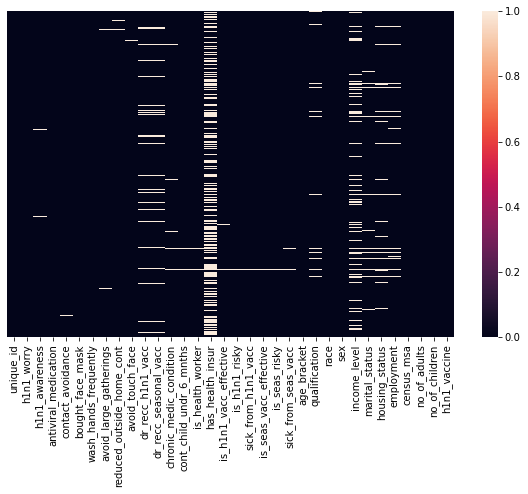

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(ds.isnull(),yticklabels=False)

In [34]:
ds["race"].fillna(ds["race"].mode()[0],inplace=True)
ds["marital_status"].fillna(ds["marital_status"].mode()[0],inplace=True)
ds["housing_status"].fillna(ds["housing_status"].mode()[0],inplace=True)
ds["employment"].fillna(ds["employment"].mode()[0],inplace=True)
ds["census_msa"].fillna(ds["census_msa"].mode()[0],inplace=True)
ds["income_level"].fillna(ds["income_level"].mode()[0],inplace=True)
ds["has_health_insur"].fillna(ds["has_health_insur"].mode()[0],inplace=True)
ds["dr_recc_h1n1_vacc"].fillna(ds["dr_recc_h1n1_vacc"].mode()[0],inplace=True)
ds["dr_recc_seasonal_vacc"].fillna(ds["dr_recc_seasonal_vacc"].mode()[0],inplace=True)
ds["h1n1_worry"].fillna(ds["h1n1_worry"].mode()[0],inplace=True)
ds["h1n1_awareness"].fillna(ds["h1n1_awareness"].mode()[0],inplace=True)
ds["antiviral_medication"].fillna(ds["antiviral_medication"].mode()[0],inplace=True)
ds["contact_avoidance"].fillna(ds["contact_avoidance"].mode()[0],inplace=True)
ds["bought_face_mask"].fillna(ds["bought_face_mask"].mode()[0],inplace=True)
ds["wash_hands_frequently"].fillna(ds["wash_hands_frequently"].mode()[0],inplace=True)
ds["avoid_large_gatherings"].fillna(ds["avoid_large_gatherings"].mode()[0],inplace=True)
ds["reduced_outside_home_cont"].fillna(ds["reduced_outside_home_cont"].mode()[0],inplace=True)
ds["avoid_touch_face"].fillna(ds["avoid_touch_face"].mode()[0],inplace=True)
ds["chronic_medic_condition"].fillna(ds["chronic_medic_condition"].mode()[0],inplace=True)
ds["cont_child_undr_6_mnths"].fillna(ds["cont_child_undr_6_mnths"].mode()[0],inplace=True)
ds["is_health_worker"].fillna(ds["is_health_worker"].mode()[0],inplace=True)
ds["is_h1n1_vacc_effective"].fillna(ds["is_h1n1_vacc_effective"].mode()[0],inplace=True)
ds["is_h1n1_risky"].fillna(ds["is_h1n1_risky"].mode()[0],inplace=True)
ds["sick_from_h1n1_vacc"].fillna(ds["sick_from_h1n1_vacc"].mode()[0],inplace=True)
ds["is_seas_vacc_effective"].fillna(ds["is_seas_vacc_effective"].mode()[0],inplace=True)
ds["is_seas_risky"].fillna(ds["is_seas_risky"].mode()[0],inplace=True)
ds["sick_from_seas_vacc"].fillna(ds["sick_from_seas_vacc"].mode()[0],inplace=True)
ds["qualification"].fillna(ds["qualification"].mode()[0],inplace=True)
ds["no_of_adults"].fillna(ds["no_of_adults"].mode()[0],inplace=True)
ds["no_of_children"].fillna(ds["no_of_children"].mode()[0],inplace=True)

In [18]:
ds.sample(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
2258,2258,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,Non-MSA,1.0,0.0,1
24442,24442,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Other or Multiple,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,0.0,1.0,0
1940,1940,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Principle City",0.0,2.0,0
34,34,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,2.0,1
15642,15642,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,Other or Multiple,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,1.0,0
4679,4679,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Principle City",2.0,1.0,1
8346,8346,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,1.0,0
4501,4501,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Female,"> $75,000",Married,Own,Employed,"MSA, Principle City",1.0,1.0,0
20338,20338,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0
354,354,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",1.0,2.0,1


<AxesSubplot:>

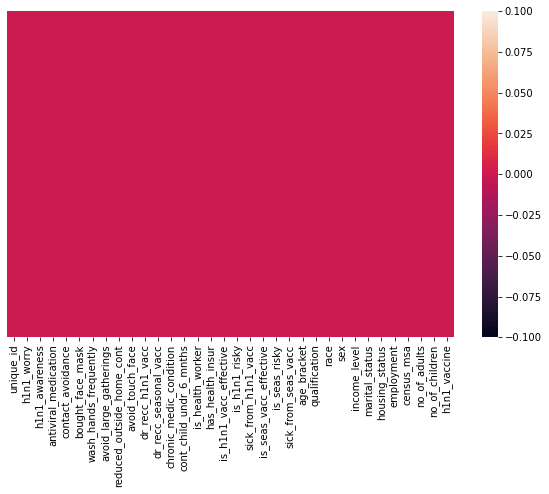

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(ds.isnull(),yticklabels=False)

<AxesSubplot:xlabel='census_msa', ylabel='count'>

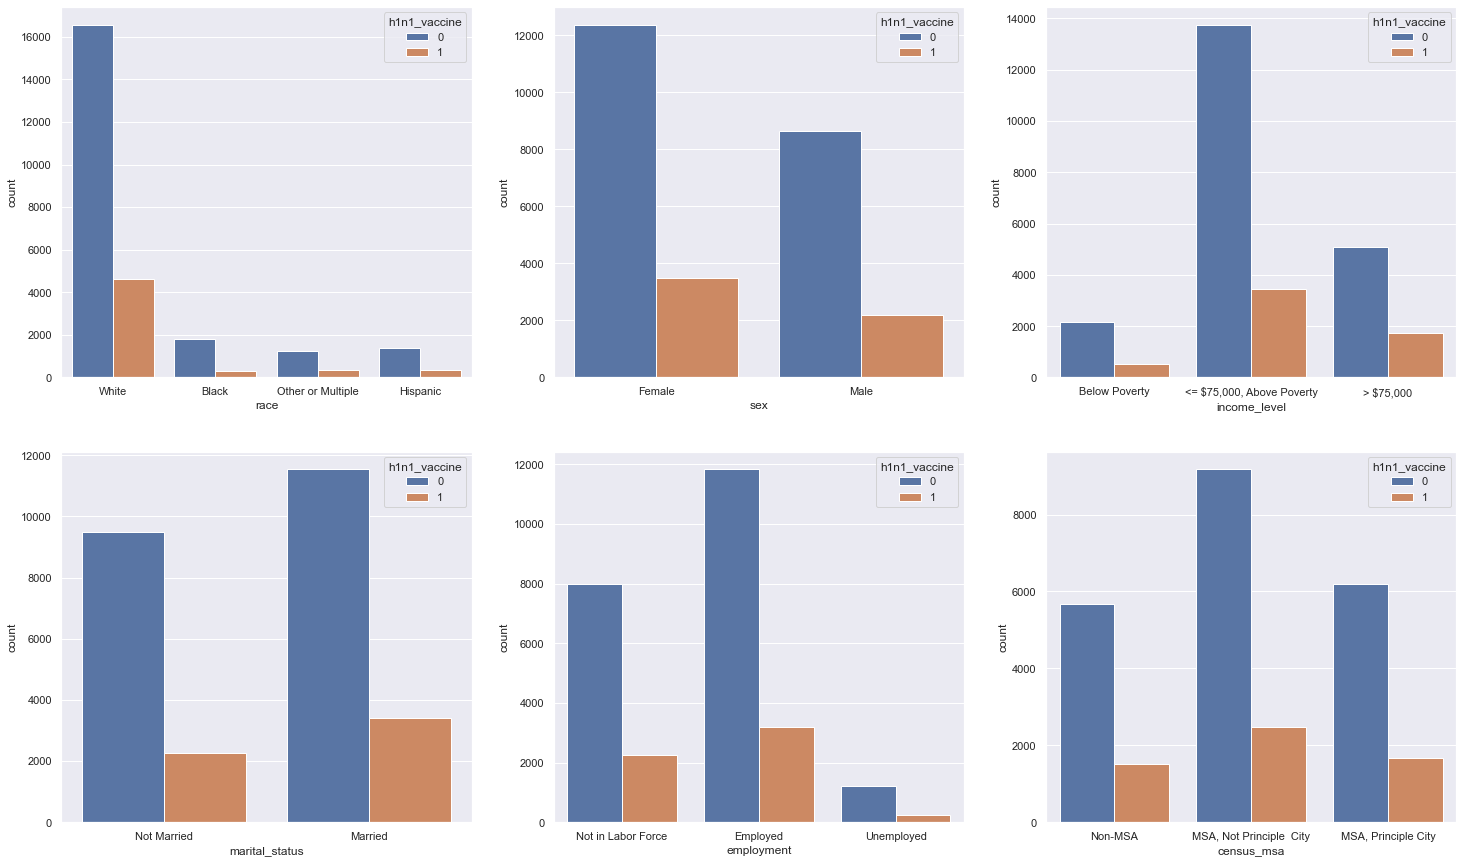

In [77]:
sns.set(rc={'figure.figsize':(25,15)})
plt.subplot(231)
sns.countplot(x="race", hue='h1n1_vaccine', data=ds)
plt.subplot(232)
sns.countplot(x="sex", hue='h1n1_vaccine', data=ds)
plt.subplot(233)
sns.countplot(x="income_level", hue='h1n1_vaccine', data=ds)
plt.subplot(234)
sns.countplot(x="marital_status", hue='h1n1_vaccine', data=ds)
plt.subplot(235)
sns.countplot(x="employment", hue='h1n1_vaccine', data=ds)
plt.subplot(236)
sns.countplot(x="census_msa", hue='h1n1_vaccine', data=ds)


<AxesSubplot:xlabel='no_of_adults', ylabel='count'>

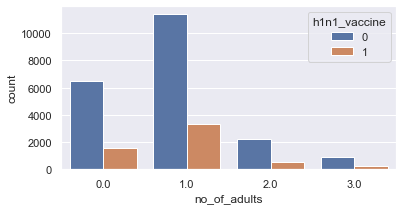

In [86]:
sns.set(rc={'figure.figsize':(6,3)})
sns.countplot(x="no_of_adults", hue='h1n1_vaccine', data=ds)

<AxesSubplot:xlabel='no_of_children', ylabel='count'>

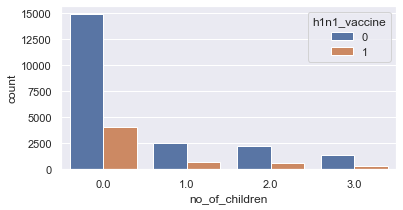

In [87]:
sns.countplot(x="no_of_children", hue='h1n1_vaccine', data=ds)

In [37]:
cor=ds.corr()

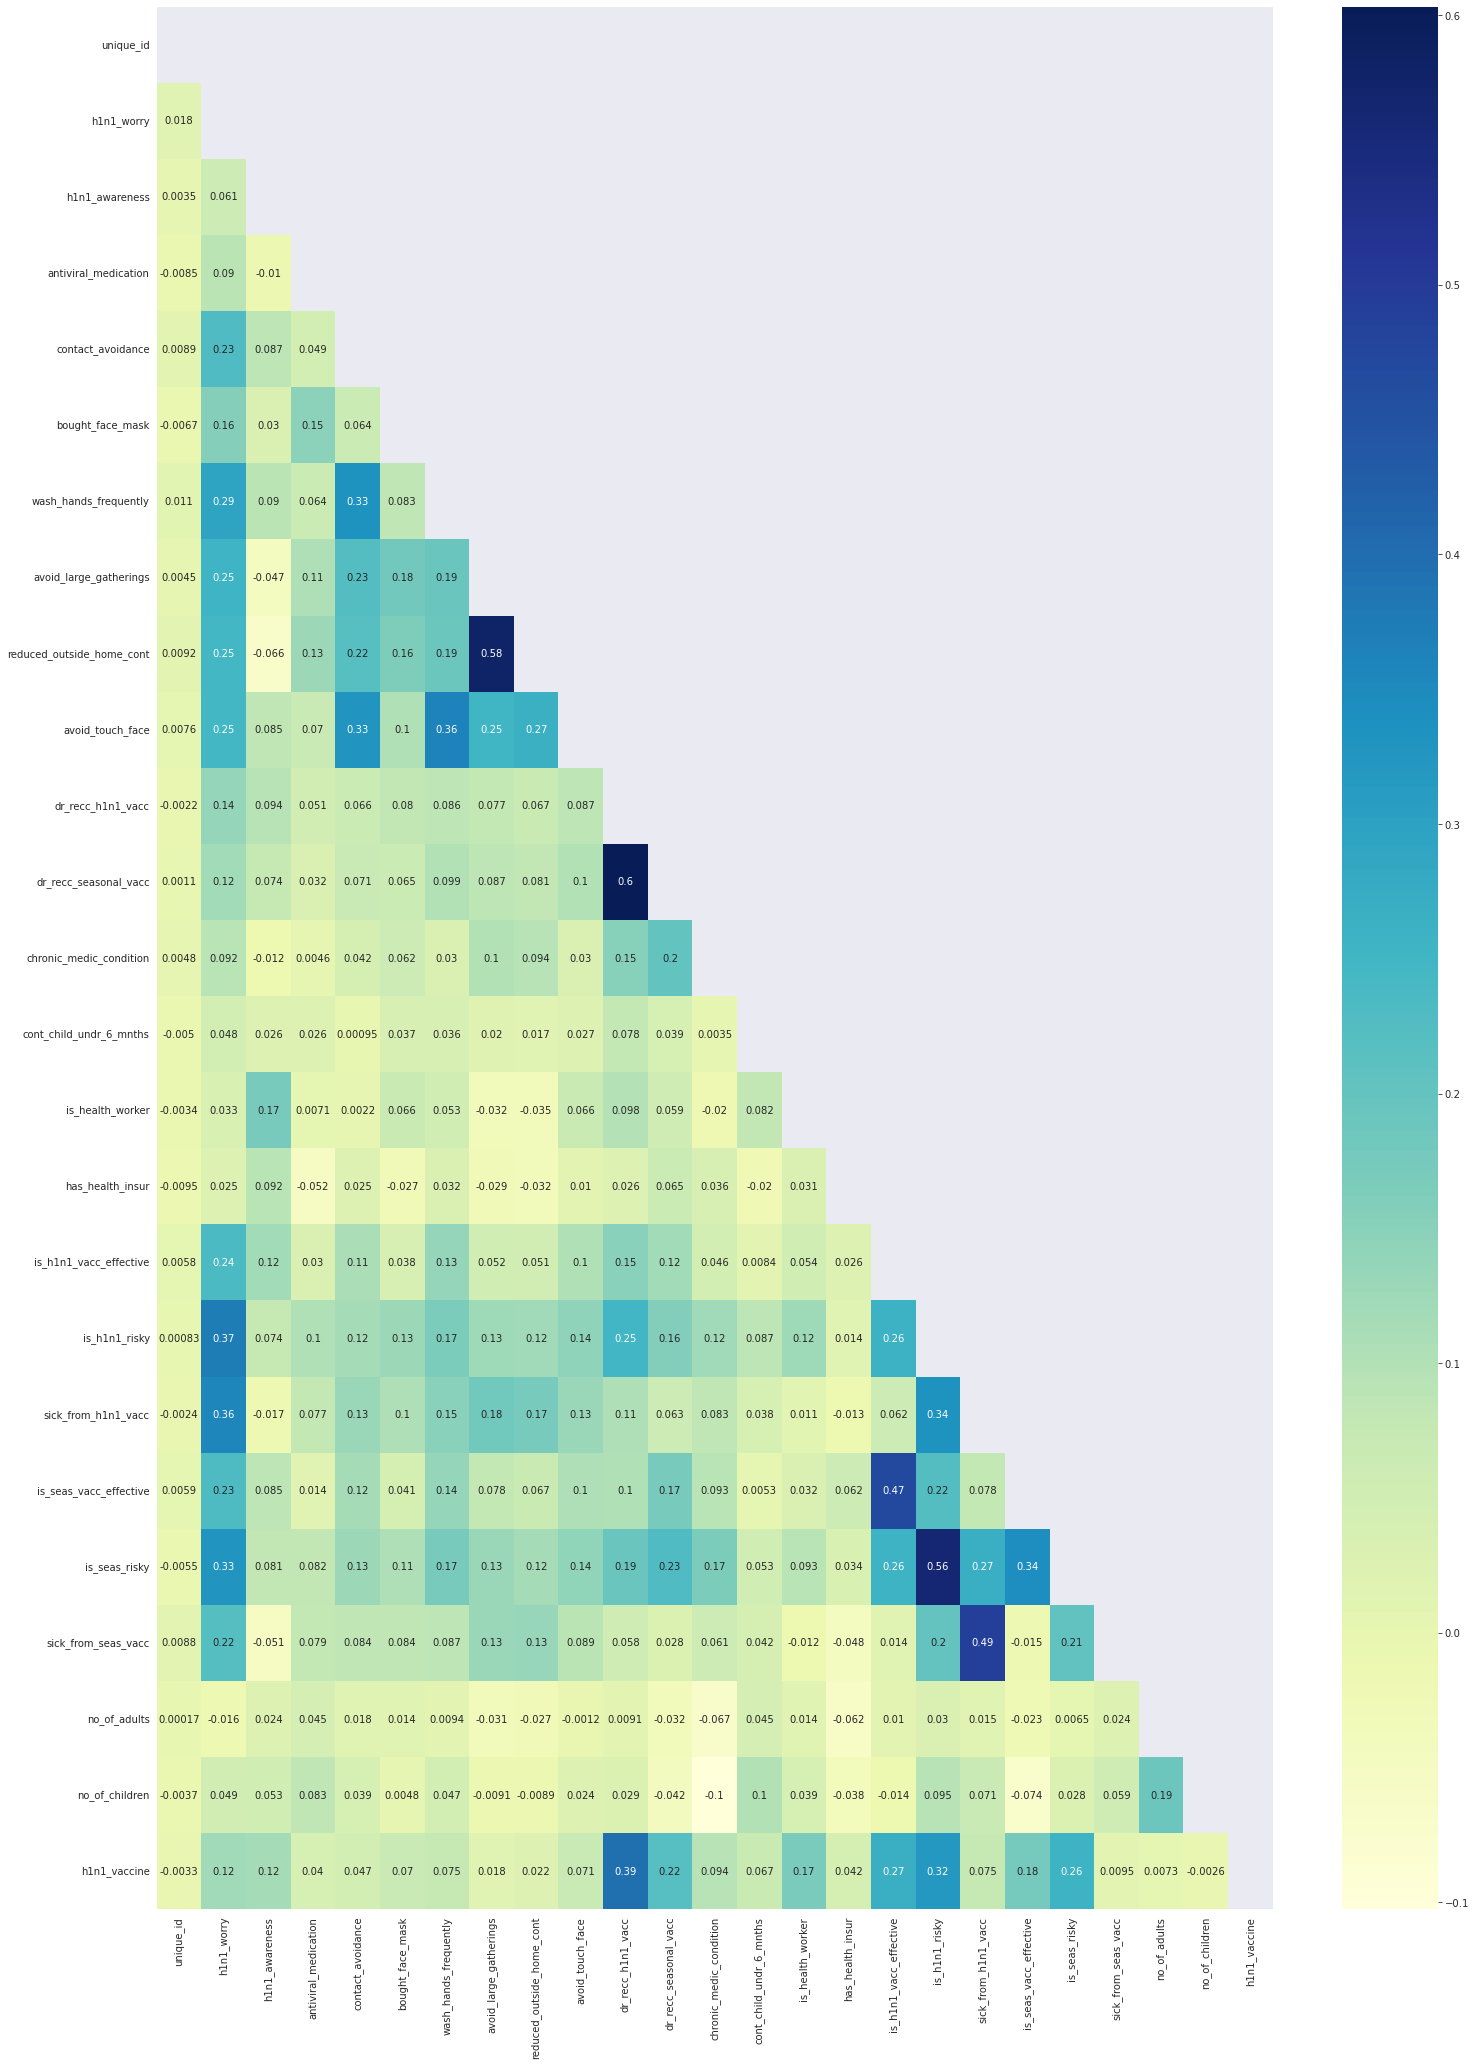

In [49]:
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("dark"):
    f, ax = plt.subplots(figsize=(25,35))
    ax = sns.heatmap(cor,
mask=mask,annot=True,cmap="YlGnBu")

<function matplotlib.pyplot.show(close=None, block=None)>

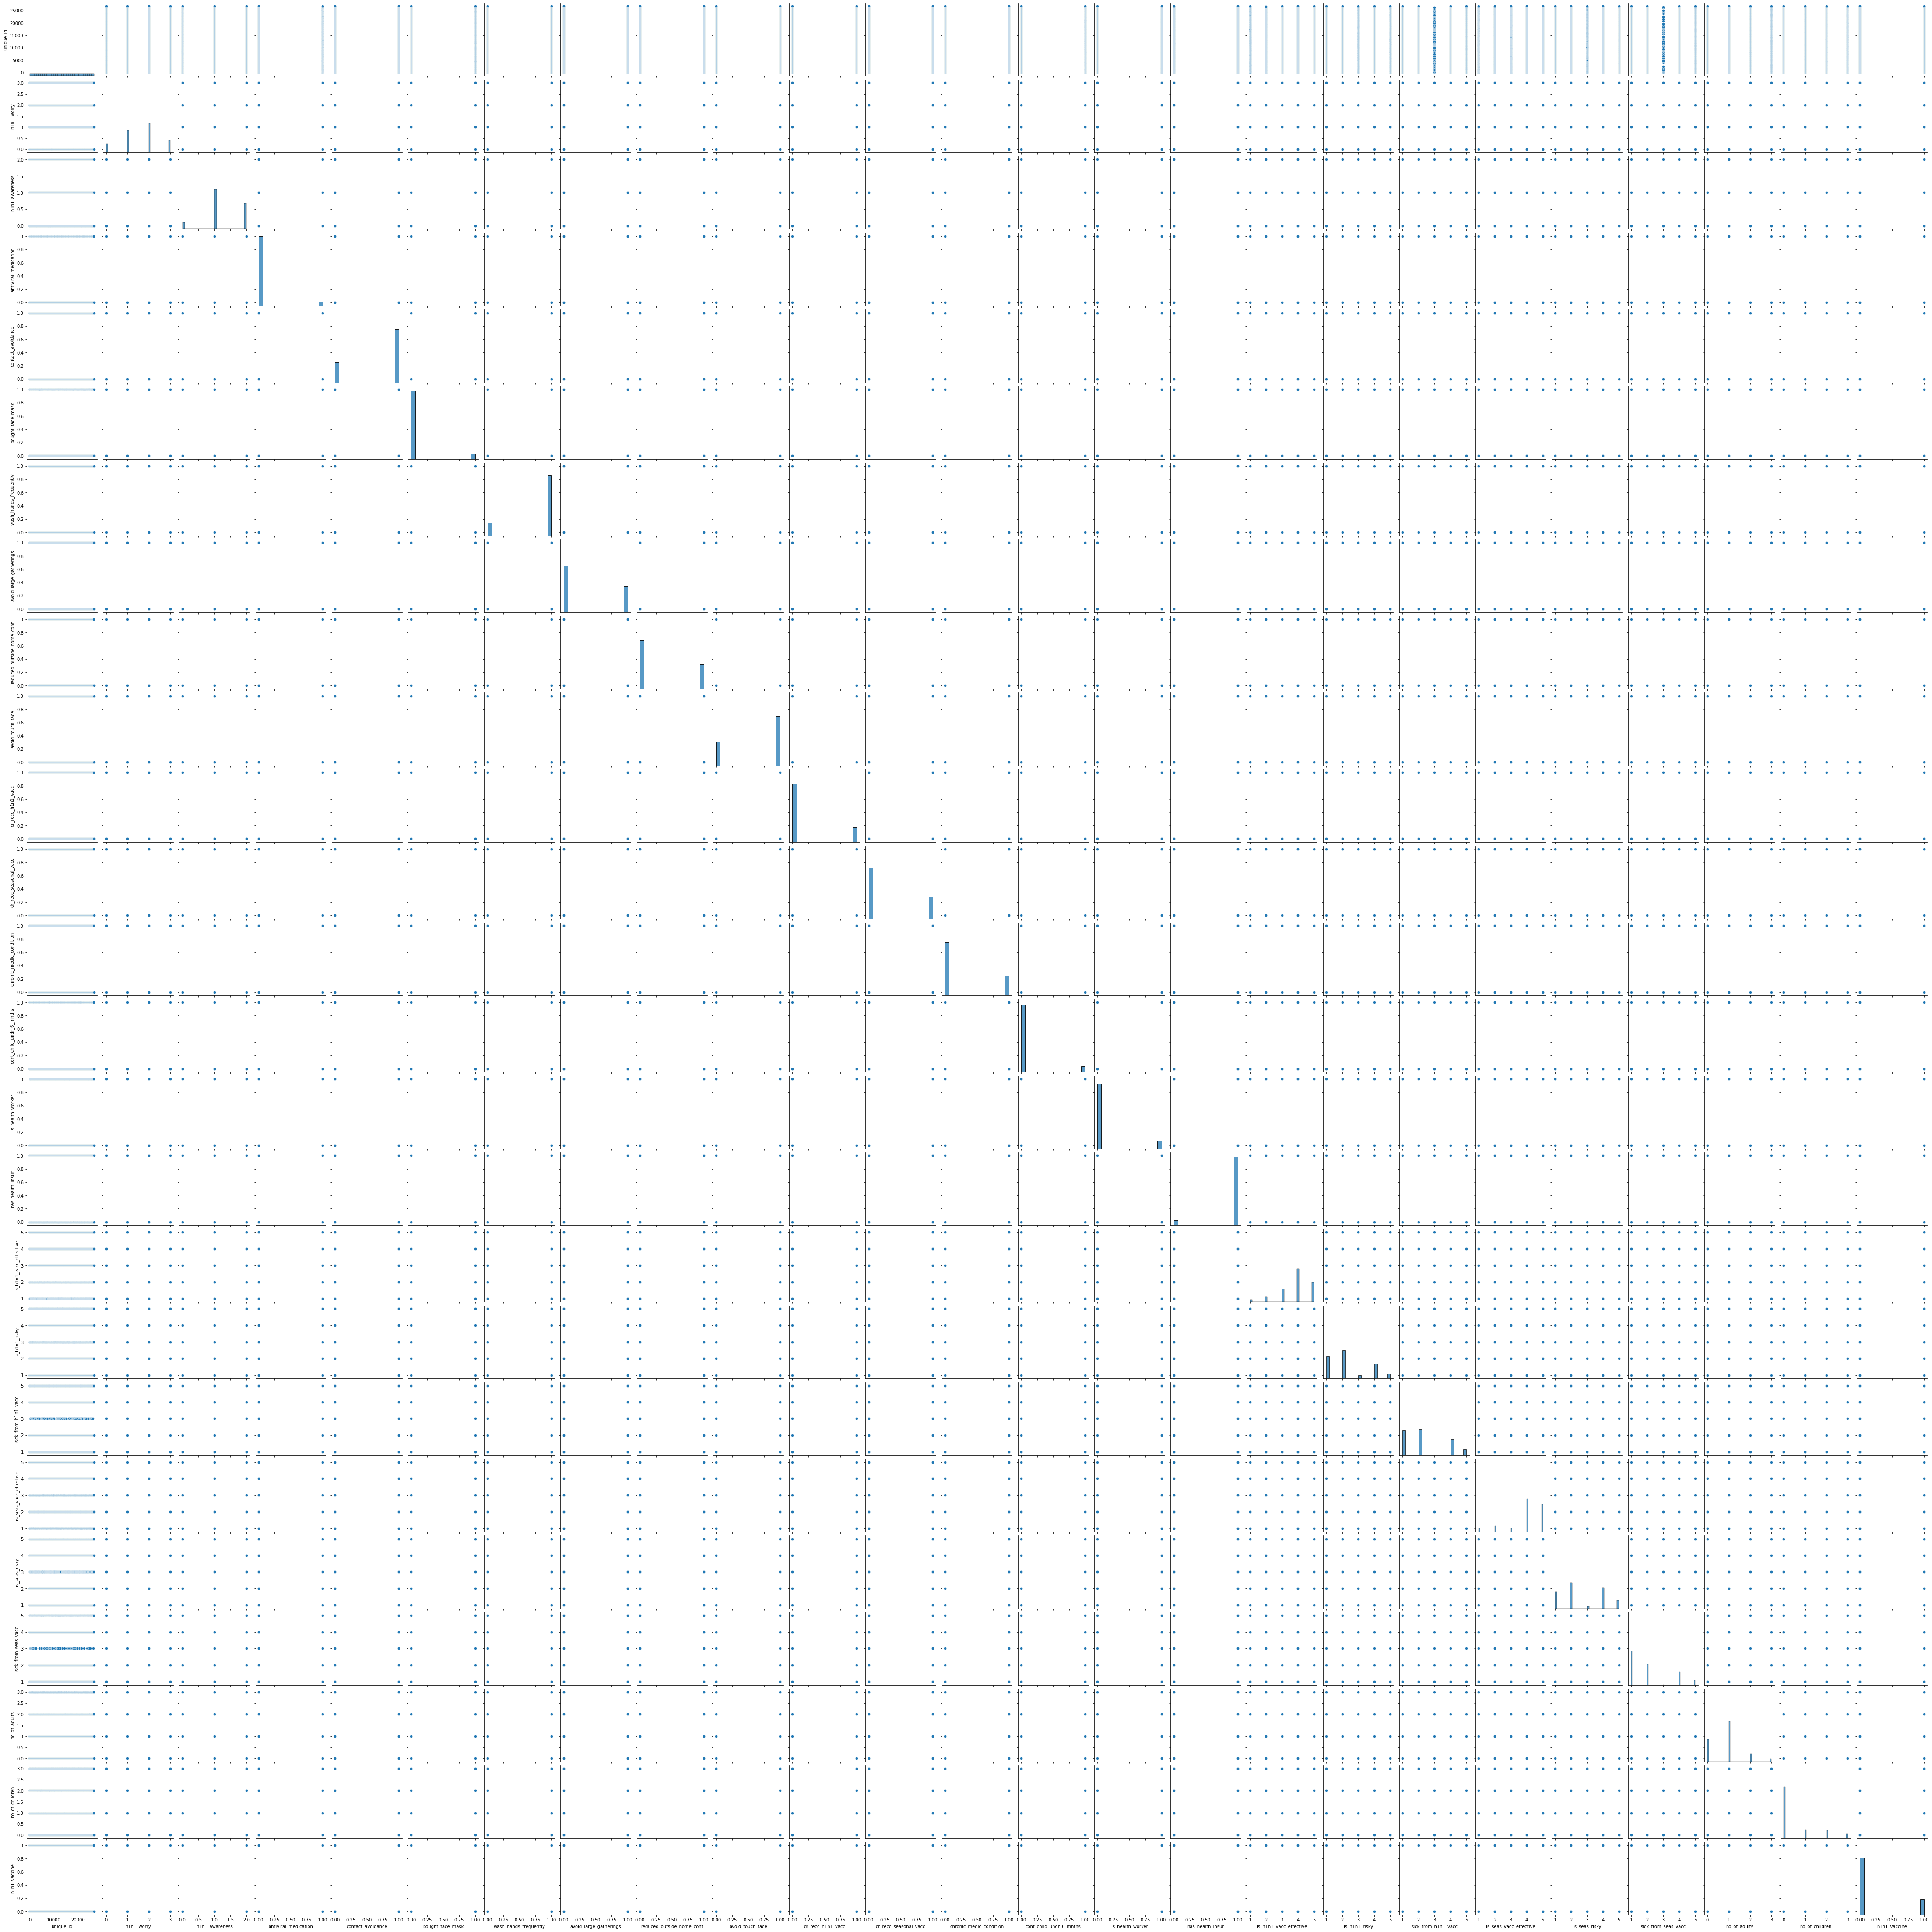

In [53]:
sns.pairplot(ds)
plt.show

In [95]:
ds["race"] = le.fit_transform(ds["race"])
ds["sex"] = le.fit_transform(ds["sex"])
ds["income_level"] = le.fit_transform(ds["income_level"])
ds["marital_status"] = le.fit_transform(ds["marital_status"])
ds["employment"] = le.fit_transform(ds["employment"])
ds["census_msa"] = le.fit_transform(ds["census_msa"])
ds["housing_status"] = le.fit_transform(ds["housing_status"])

#data = pd.get_dummies(data)
ds.head(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3,0,2,1,0,1,2,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3,1,2,1,1,0,0,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,1,0,1,0,0,0,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3,0,2,1,1,1,1,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3,0,0,0,0,0,0,1.0,0.0,0


In [154]:
print(ds["age_bracket"].value_counts())
print(ds["qualification"].value_counts())

4    6843
3    5563
2    5238
0    5215
1    3848
Name: age_bracket, dtype: int64
College Graduate    11504
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64


In [155]:
ds["age_bracket"]=ds["age_bracket"].replace('18 - 34 Years',int(0))
ds["age_bracket"]=ds["age_bracket"].replace('35 - 44 Years',int(1))
ds["age_bracket"]=ds["age_bracket"].replace('45 - 54 Years',int(2))
ds["age_bracket"]=ds["age_bracket"].replace('55 - 64 Years',int(3))
ds["age_bracket"]=ds["age_bracket"].replace('65+ Years',int(4))

ds["qualification"]=ds["qualification"].replace('College Graduate',int(1))
ds["qualification"]=ds["qualification"].replace('Some College',int(2))
ds["qualification"]=ds["qualification"].replace('12 Years',int(3))
ds["qualification"]=ds["qualification"].replace('< 12 Years',int(4))


In [156]:
x=ds.drop(["h1n1_vaccine","unique_id"],axis=1)
y=ds["h1n1_vaccine"]

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [158]:
model=LogisticRegression(solver="liblinear")

In [159]:
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [160]:
model.score(x_train,y_train)

0.8377554295495881

In [161]:
model.score(x_test,y_test)

0.832272557094721

In [162]:
dtree=DecisionTreeClassifier(criterion="gini")
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [163]:
dtree.score(x_train,y_train)

1.0

In [164]:
dtree.score(x_test,y_test)

0.7391738425059279

In [165]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=0)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))

0.827538247566064


In [166]:
y_predict = dTreeR.predict(x_test)

In [167]:
print(dTreeR.score(x_test, y_test))

0.823786347185823


In [168]:
from sklearn import metrics

<AxesSubplot:>

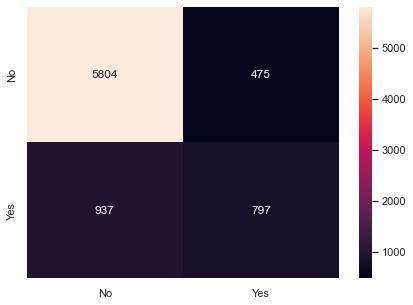

In [169]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [170]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier( n_estimators=150,base_estimator=dTreeR,random_state=0)
bgcl = bgcl.fit(x_train,y_train)
y_predict = bgcl.predict(x_test)
print(bgcl.score(x_test,y_test))

0.8296518157993261


<AxesSubplot:>

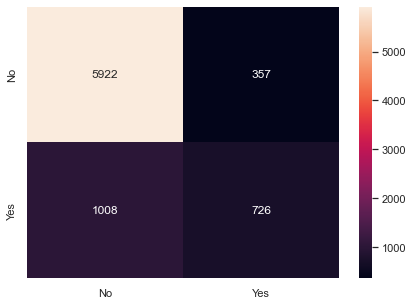

In [171]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [173]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 120,random_state=0)
abcl = abcl.fit(x_train, y_train)
y_predict = abcl.predict(x_test)
print(abcl.score(x_test, y_test))

0.8317733682765506


In [175]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 200,random_state=0)
gbcl = gbcl.fit(x_train, y_train)
y_predict = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))

0.836890053662798


<AxesSubplot:>

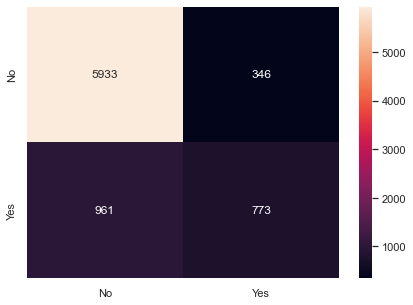

In [176]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [178]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 160, random_state=0,max_features=3)
rfcl = rfcl.fit(x_train, y_train)

0.8313989766629227


<AxesSubplot:>

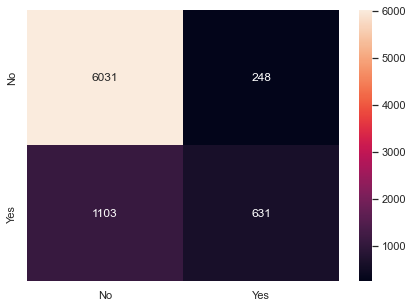

In [181]:
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')